In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from mlxtend.plotting import plot_decision_regions

In [3]:
df=pd.read_csv('Placement.csv')
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cgpa          100 non-null    float64
 1   resume_score  100 non-null    float64
 2   placed        100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
df.describe()

,cgpa,resume_score,placed
count,100.0000,100.000000,100.000000
mean,6.9422,6.930500,0.500000
std,1.1192,0.979608,0.502519
min,5.2700,4.950000,0.000000
25%,5.9800,6.190000,0.000000
50%,6.6200,7.055000,0.500000
75%,8.0450,7.640000,1.000000
max,9.4000,9.060000,1.000000


## From my dataset I can see that there is no missing value

In [8]:
df.duplicated().sum()

0

In [62]:
df['placed'].value_counts()

placed
1    50
0    50
Name: count, dtype: int64

## Basic EDA 

Text(0, 0.5, 'Resume_score')

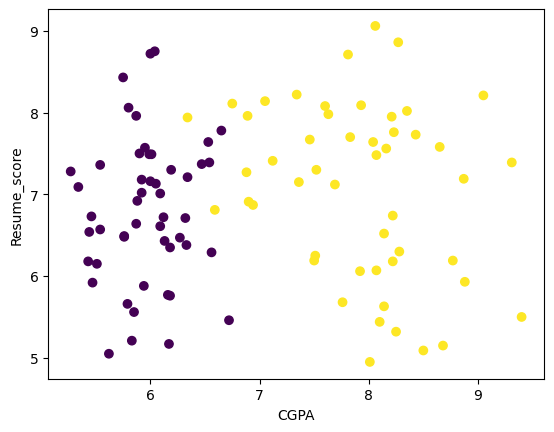

In [10]:
plt.scatter(df['cgpa'],df['resume_score'],c=df['placed'])
plt.xlabel("CGPA")
plt.ylabel("Resume_score")

Text(0.5, 1.0, 'Class Distribution')

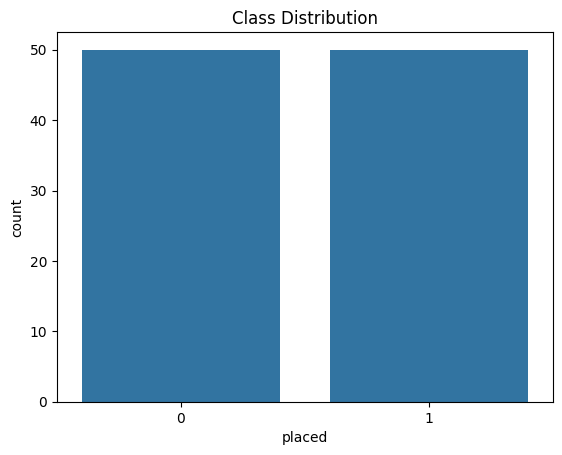

In [61]:
sns.countplot(x='placed', data=df)
plt.title("Class Distribution")

<Axes: >

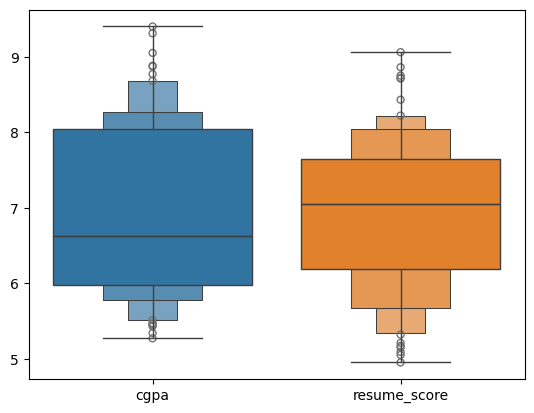

In [25]:
sns.boxplot(data=df[['cgpa','resume_score']])
sns.boxenplot(data=df[['cgpa','resume_score']])

<Axes: >

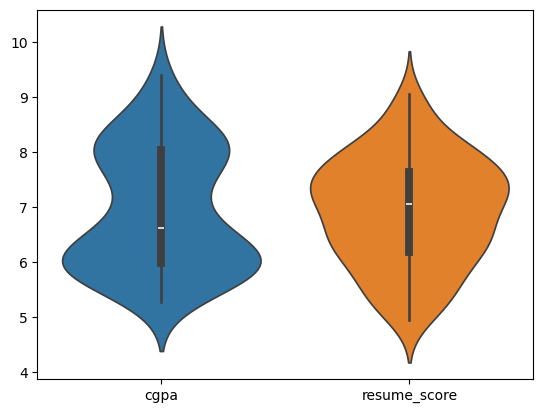

In [19]:
sns.violinplot(data=df[['cgpa','resume_score']])

<Axes: xlabel='cgpa', ylabel='Count'>

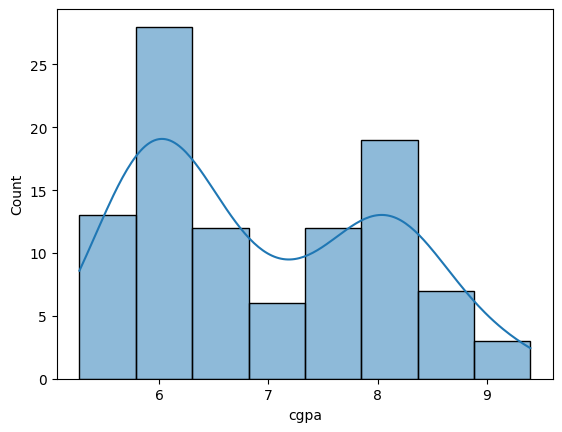

In [27]:
sns.histplot(data=df['cgpa'],kde=True)

<Axes: xlabel='resume_score', ylabel='Count'>

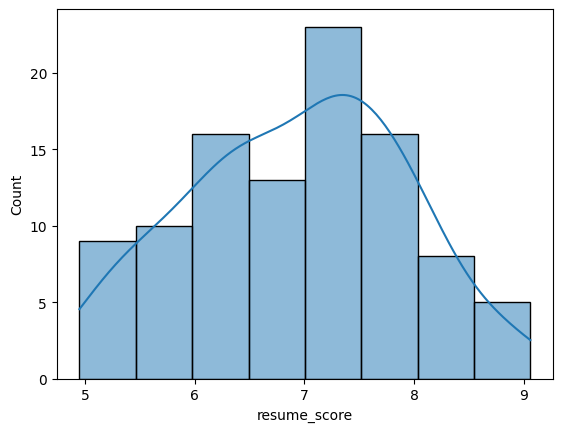

In [28]:
sns.histplot(data=df['resume_score'],kde=True)

## Data are almost similar no need to scale

In [34]:
X=df.iloc[:,:2]
y=df.iloc[:,-1]

In [38]:
X.shape

(100, 2)

In [37]:
y.shape

(100,)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [42]:
clf=LogisticRegression()

In [44]:
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [45]:
y_pred=clf.predict(X_test)

In [46]:
y_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy=accuracy_score(y_test,y_pred)

In [49]:
accuracy

1.0

C:\Users\HP Laptop 15\tfenv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

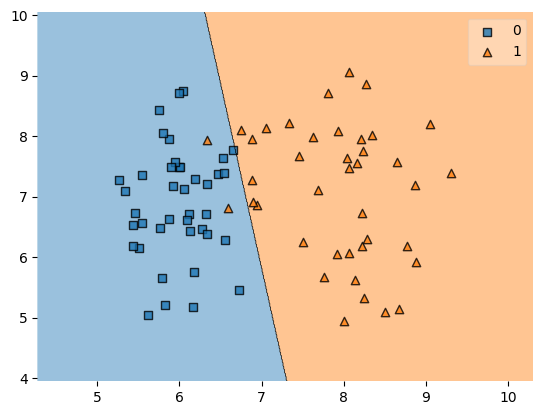

In [51]:
plot_decision_regions(X_train.values,y_train.values,clf=clf)

In [53]:
comparison=pd.DataFrame({
    'Actual':y_test.values,
    'Predicted':y_pred
    
})

In [56]:
comparison

,Actual,Predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1
6,0,0
7,1,1
8,0,0
9,1,1


In [63]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [64]:
cm=confusion_matrix(y_test,y_pred)

In [65]:
cm

array([[10,  0],
       [ 0, 10]], dtype=int64)